<a href="https://colab.research.google.com/github/pjmartel/python-for-scientists/blob/master/linear_regression_with_intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression is a common task in data analysis and modelling. Let's consider we have  data for a dependent variable $x_i$ and an independent variable $y_i$, and we have reason to believe they are connected by a simple linear relation:

$$y_i = m x_i + b ,$$

where $m$ and $b$ are paramenters whose "true" value is unknown. In that case, we can try to find estimates $\hat m$ and $\hat b$ such that the difference

$$ y_i - \hat y_i $$ 


where  

$$ \hat{y_i} = \hat m * x + \hat b$$

For mathemical reasons it is more convenient to minimize the *Sum of Squares*, given by:

$$ SS(\hat m, \hat b) = \sum_i (y_i - \hat y_i )^2 $$


Minimzing the $SS(\hat m, \hat b) $ as function of m and b gives rise to the well know formulas:

$${\displaystyle {\begin{aligned}{\widehat {\alpha }}&={\bar {y}}-{\widehat {\beta }}\,{\bar {x}},\\[5pt]{\widehat {\beta }}&={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}\\[6pt]&={\frac {\operatorname {Cov} (x,y)}{\operatorname {Var} (x)}}\\[5pt]&=r_{xy}{\frac {s_{y}}{s_{x}}}.\\[6pt]\end{aligned}}}  $$

There are multiple implementations of this method in the Pyverse, some specific to this model, some much more general. The Numpy module has a function named "`polyfit`" that can do least squares regression for a polynomial function:

$$ y = a_n x^n + a_{n-1} x^{n-1} + ... + a_1 x + a_0$$

Our simple linear model is just a particular case of the above, for $n=1$.

Let demonstrate the use of this function with a simulated linear dataset model.

First, we do the necessary imports:

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import numpy.random as rnd

In [0]:
style.available

We import the *random* module of numpy because we want to add random noise to our simulated data.

Let's create a numpy 1D array for our independent variable;

In [58]:
N = 20 # number of data points
x = np.linspace(0,10, N)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

Let's create our independent variable `y`  by aplying the linear model to independent variable:

In [0]:
m = 3
b = 2
y = m*x + b 

Let's plot the y *versus* x 

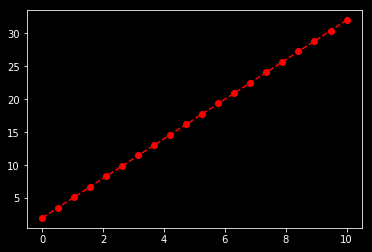

In [60]:
plt.plot(x,y,'ro--')

This is not that interesting, because our independent variable has no error, so the fitting to the linear model is perfect.

Let's add some random gaussian noise to our model

In [0]:
# Normal distribution with mean 0 and std 1, N points
y = y + rnd.normal(loc=0, scale=1, size=N) 

We just added a normally distributed random number (mean=0, std=1) to every point in our sample. This *simulates* experimental errors in the measurment of variable $y$.

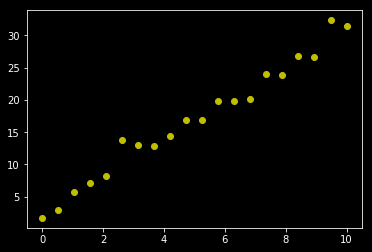

In [67]:
plt.plot(x,y,'yo')

That's more like it! We can now use the `polyfit` function to estimate the linear parameters of our "hidden" model.

In [73]:
np.polyfit(x,y,deg=1) # simple linear mode = polynomial degree one 

array([2.86050026, 2.62879087])

We can see that our function returns the two estimates of m and b as two elemens of a numpy array. In cases like this, it is convenient 
assign the return values directly to two separate variables:

In [0]:
mhat, bhat = np.polyfit(x,y,deg=1)

We use the "hat" designations to emphasize the fact that m and b are not the "true values" (unknown in real-life scenarios, but known 
here for simulated data ), but rather *estimates* of the true variables.

In [75]:
print("mhat ={:6.3f}  bhat ={:6.3f}".format(mhat,bhat))
print("m ={:6.3f}  b ={:6.3f}".format(m,b))



mhat = 2.861  bhat = 2.629
m = 3.000  b = 2.000


As you can see, there is considerable discrepancy between the estimated and the "true" values, particularly for the the b parameter.

**HANDS-ON:** computer the *Pearson correlation coefficient* ($r_{xy}$), and its square, the *Coefficient of determination*($R^2$)

In [76]:
#@title SOLUTION 
print("Pearson correlation coefficient - ",np.corrcoef(x,y)[1,0])
print("Coefficient of determination (R²) - ",np.corrcoef(x,y)[1,0]**2)

Pearson correlation coefficient -  0.9886478353513056
Coefficient of determination (R²) -  0.9774245423448223


Let's plot the regression line together with our data point, with proper labels:

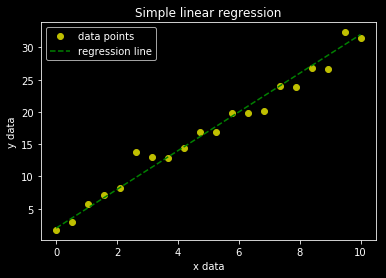

In [77]:
plt.title("Simple linear regression")
plt.xlabel("x data")
plt.ylabel("y data")
plt.plot(x,y,'yo',label="data points")
plt.plot(x,m*x+b,'g--', label="regression line")
plt.legend();

**HANDS-ON:** Go and try to re-run the above cells several times. Each time the random error will be different, so you will get different values for mhat, bhat and R². This will give you a good feeling for the *interval* of variation that our estimates can populate when data is sampled from a population with a given error distribution (in this case the random error is normall distributed with mean 0 and standard deviation 1)

The intervals of variation of $\hat m$ and $\hat b$  should gives a measure of the *confidence* we can have in our estimates. A more rigorous way to deal with the problem would be to obtain *confidence intervals* for $\hat m$ and $\hat b$. Unfortunately, most tools to compute simple linear regression do not produce this values, which can be crucial if parameter estimation is our primary goal.  It's even more suprising considering that implementation of the computations for the said intervals is actually rahter simple. 

**HANDS-ON:** Implement the necessary calculations for computing the intervals for $\hat m$ and $\hat b$ at a given confidence level, based on the explanation given below:

If the random errors in the $y$ variable are normally distributed, the $\hat m$ and $\hat b$ values are themselves normally distributed, and a confidence interval for the "true" value $m$ and $b$ can be determined. We will assert without demonstration that :

<br>
$${\displaystyle {\frac {{\hat {m }}-m }{s_{\hat {m }}}}\ }$$
<br>

is distributed with a Student's t-distribution with $t-2$  degrees of freedom (henceforth called $t_{n-2}$), where $s_{\hat m}$ is given by:

<br>
$$ s_{\hat {m }}={\sqrt {\frac {{\frac {1}{n-2}}\sum _{i=1}^{n}{\hat {\varepsilon }}_{i}^{\,2}}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}}$$
<br>

where the $\varepsilon_i$ are the differences between the experimental and calculated $y$:

<br>
$$\varepsilon_i = \hat y_i - y_i = y_i \hat m + \hat b - y_i $$
<br>

and the $\bar x$ is the sample mean of the $x$ values:

<br>
$$ \bar x = \frac{1}{N}\sum_i x_i $$
<br>

From here a confidence interval can be found for $\hat m$ :

<br>
$${\displaystyle b \in \left[{\hat {m }}-s_{\hat {m }}t_{n-2}^{*},\ {\hat {m }}+s_{\hat {m }}t_{n-2}^{*}\right]}$$
<br>

where ${\displaystyle t_{n-2}^{*}}$ is the ${\displaystyle \scriptstyle \left(1\;-\;{\frac {\gamma }{2}}\right){\text{-th}}}$ quantile of the Student's t distribution with n−2 degrees of freedom. For example, if γ = 0.05 then the confidence level is 95%

Similarly, a confidence interval for $\hat b$ is 

<br>
$${\displaystyle b \in \left[{\hat {b }}-s_{\hat {b }}t_{n-2}^{*},\ {\hat {b }}+s_{\hat {b }}t_{n-2}^{*}\right]}$$
<br>

where $s_{\hat b}$ is the standard error of the $b$ estimate:

<br>
$${\displaystyle s_{\hat {b }}=s_{\hat {m }}{\sqrt {{\frac {1}{n}}\sum _{i=1}^{n}x_{i}^{2}}}={\sqrt {{\frac {1}{n(n-2)}}\left(\sum _{i=1}^{n}{\hat {\varepsilon }}_{j}^{\,2}\right){\frac {\sum _{i=1}^{n}x_{i}^{2}}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}}}}$$
<br>







**NOTE 1:** The ${\displaystyle \scriptstyle \left(1\;-\;{\frac {\gamma }{2}}\right){\text{-th}}}$ quantile of the Student's t distribution with n−2 degrees of freedom can be calculated using the "stats" module of the "scipy" scientific library. Here is what to do:

In [0]:
from scipy.stats import t

The t module contains many functions related to the  $t$ distribution, including probability density, cumulative distribution, and many others. The function
we need to calculate the quantile is  "`t.ppf`" (percent point function). Let's calculate the correct t-value for a give percent confidence interval:

In [87]:
N = 20 # number of points
interval = 0.95 # confidence interval
gamma = 1-interval
tval = t.ppf(1-gamma/2,df=N-2)
tval

2.10092204024096

**NOTE 2:** Remeber the exercises in the numpy notebook where we found numpy vector expressions to calculate variance/covariance and the correlation coefficient. We need to use a similar approach here. Calculations you need to do:



*   Mean of the sum of squares of $x_i$
*   Sum of quadratic deviatrion from the mean of $x_i$
*  Sum of the squares of differences between $\hat y_i$ and $y_i$
* From the above compute the $s_\hat m$ and the $s_\hat b$
* Compute the $t$ value has explained above. 
* Use the $s_\hat m$, $s_\hat b$ and $t$ value to compute the confidence intervals

1. Try to keep everything nice and tidy, defining a few functions to make the calculations more clear.

2. Try to reuse some of the functions you created in the numpy exercise.  

3. Ask the tutors help if you get stuck


